val/epoch
count  214.000000
mean     2.272255
std      1.042083
min      1.654620
25%      1.934645
50%      2.011030
75%      2.198985
max     12.111850

min val/epoch    1.65462
dtype: float64

idxmin val/epoch    139
dtype: int64

train/epoch
count   214.000000
mean      2.521087
std       1.459627
min       0.767530
25%       1.689715
50%       2.173315
75%       2.811803
max      12.378280

min train/epoch    0.76753
dtype: float64

idxmin train/epoch    140
dtype: int64

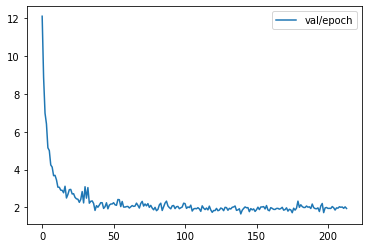

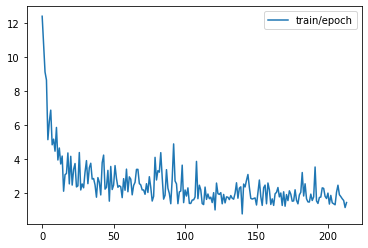

In [1]:
import os
import pandas as pd
import numpy as np
from rich import print
import matplotlib.pyplot as plt
from IPython.display import display

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


log_dir = "data_full/yolact/2022-02-25_kalo/training_2022-03-01-12꞉00/logs"

extract_data_from = ["train_epoch_total", "val_epoch_total"]

def tabulate_events(dpath):
    final_out = {}
    
    for folder_path in list(filter(os.path.isdir, [os.path.join(dpath,x) for x in os.listdir(dpath)])):
        folder = os.path.basename(folder_path)

        if extract_data_from is None or folder in extract_data_from:
    
            for dname in os.listdir(folder_path):
                ea = EventAccumulator(os.path.join(folder_path, dname)).Reload()
                tags = ea.Tags()['scalars']

                out = {}

                for tag in tags:
                    tag_values=[]
                    wall_time=[]
                    steps=[]

                    for event in ea.Scalars(tag):
                        tag_values.append(event.value)
                        wall_time.append(event.wall_time)
                        steps.append(event.step)

                    out[tag] = pd.DataFrame(tag_values, columns=[tag], index=steps)

                if len(tags)>0:      
                    df = pd.concat(out.values())
                    # display(df.head())
                    
                    print(df.describe())
                    print("min", df.min())
                    print("idxmin", df.idxmin())
                    
                    df.plot()

                final_out[dname] = df


tabulate_events(log_dir)